# Random Forest & Random search

We will use the random search to tune the hyperparameters of the random forest model 

### Import libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
import joblib
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
import matplotlib.pyplot as plt
from utils import *

### Load data 

In [3]:
load=np.load(r'../data/processed/No_normalized_data_V3.npz')
keys=load.files
X_train, y_train, X_test, y_test= [load[k] for k in keys[:4]]
colsx=load['colsx']
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((1063574, 16), (1063574,), (267242, 16), (267242,))

### Model

**Pipeline**

In [4]:
model = Pipeline(
    [
        (
            "model",
            RandomForestRegressor(criterion='squared_error', verbose=1,n_jobs=-1,random_state=0)
        ),
    ]
)

**Input shape**

In [5]:
n_inp=X_train.shape[1]
print(n_inp)

16


**Random Search parameters**

In [8]:
param_distributions = {
    "model__n_estimators": loguniform_int(100, 500), # default 100
    "model__min_samples_split": uniform_int(1, 5), # default 2
    "model__max_depth": loguniform_int(20, 150), # default None
    "model__min_samples_leaf": loguniform_int(1, 5), # default 1
    "model__max_features":uniform_int(5, n_inp) # default 1.0
}

model_random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=15, #  number of different combinations to try,
    cv=4,# number of folds to use for cross validation: 5 mean 25% for val and 75% for test
    verbose=1,
)

**Fit**

In [27]:
First_time=False
# If the First_time = True, we will initialize the model, fit it, and saved it 
# Otherwise, we will just load the pretrained model 
if First_time:
    # fit the model 
    model_random_search.fit(X_train, y_train)
    # Save the model
    joblib.dump(model_random_search, r'../models/RandForest/RandSear_RandFor_V1.pkl')
else: 
    # Load the model
    model_random_search2=joblib.load(r'../models/RandForest/RandSear_RandFor_V1.pkl')

In [11]:
#Make a beep to notify the end of model training
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 2000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

**The best estimator and the best parameters**

In [17]:
'''Resultat 
RandomForestRegressor(max_depth=68, max_features=5, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=276, n_jobs=-1,
                      random_state=0, verbose=1)
'''
RF_best=model_random_search2.best_estimator_ ['model']
RF_best

RandomForestRegressor(max_depth=68, max_features=5, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=276, n_jobs=-1,
                      random_state=0, verbose=1)

In [16]:
'''
Resultat:
{'model__max_depth': 68,
 'model__max_features': 5,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 5,
 'model__n_estimators': 276}
'''
model_random_search2.best_params_

{'model__max_depth': 68,
 'model__max_features': 5,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 5,
 'model__n_estimators': 276}

### Prediction 

In [19]:
yh_train=RF_best.predict(X_train)
yh_test=RF_best.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 276 out of 276 | elapsed:    5.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 276 out of 276 | elapsed:    0.9s finished


### Metrics and plot

**Train/Test set Metrics**

In [20]:
print ('_'*20,'\n','Train set')
print(local_metrics(y_train, yh_train))

print ('_'*20,'\n','Test set')
print(local_metrics(y_test, yh_test))

____________________ 
 Train set
{'r2_score': 0.9999009769749209, 'MSE': 0.03483109795810131, 'RMSE': 0.18663091372573118, 'NMSE': 8.709420811893875e-06}
____________________ 
 Test set
{'r2_score': 0.8775015737002211, 'MSE': 40.1158832295746, 'RMSE': 6.333710068322878, 'NMSE': 0.013701415111505402}


**Real vs prediciton plot**

In [21]:
y_train, yh_train

(array([25.89539337, 25.88982391, 25.88938141, ..., 62.13838736,
        62.13342152, 62.13142866]),
 array([25.74892074, 25.80154233, 25.81084665, ..., 62.05531916,
        62.08200314, 61.92952095]))

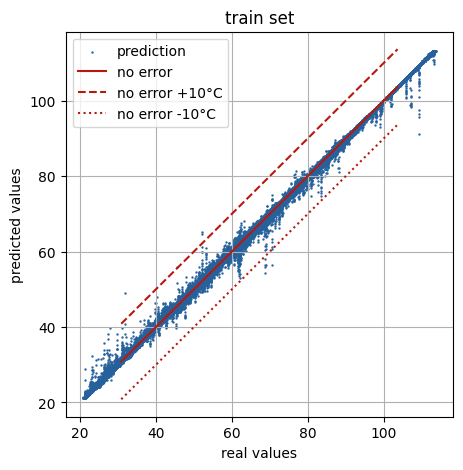

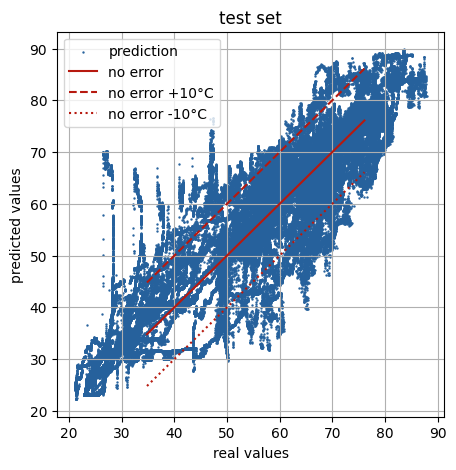

In [22]:
plot_prediction_real(y_train,yh_train,label='train set',offset=10,\
                     fig_size=(5,5))
plot_prediction_real(y_test,yh_test,label='test set',fig_size=(5,5))

**Time serie**

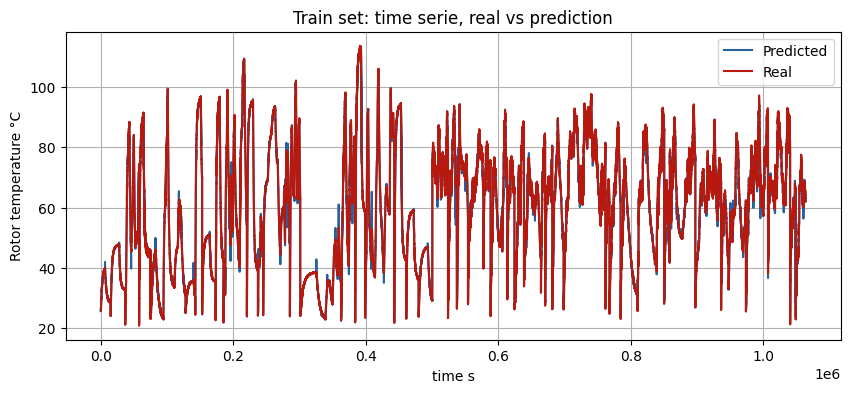

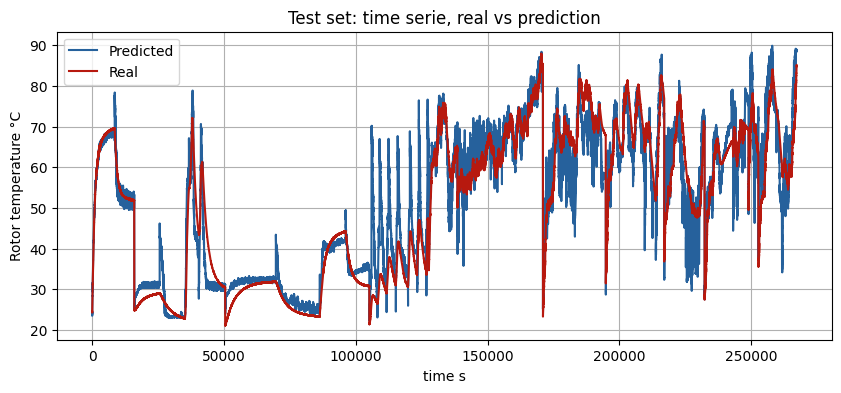

In [23]:
plot_y_yh_time(y_train,yh_train,title='Train set: time serie, real vs prediction',\
               fig_size=(10,4))
plot_y_yh_time(y_test,yh_test,title='Test set: time serie, real vs prediction',\
               fig_size=(10,4))

**Error histogram**

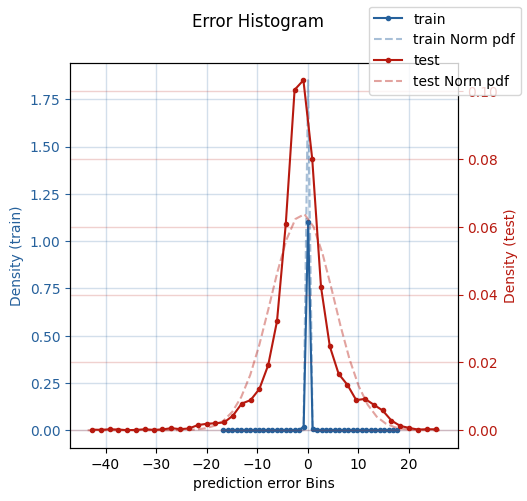

{'test': {'mean': -1.0235385796178915, 'std': 6.250460143510107}, 'train': {'mean': -0.00014658345299136245, 'std': 0.1866308561610128}}


In [24]:
_=plot_error(y_train, yh_train, y_test, yh_test)